In [17]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
import scipy as sp
import seaborn as sns
import statsmodels.api as sm
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [21]:
df = pd.read_csv("modify1.csv")

In [22]:
df.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup,dist,speed,month,dayofweek,hour,count
1310317,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,0,778,"(40.745521545410156, -73.9822006225586)",1.224311,5.665192,4,4,13,1
1310318,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,0,655,"(40.74737930297852, -74.00094604492188)",6.046037,33.230128,1,6,7,1
1310319,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,0,764,"(40.768798828125, -73.9591293334961)",7.819693,36.846722,4,4,6,1
1310320,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,0,373,"(40.749061584472656, -73.9820785522461)",1.091878,10.538232,1,1,15,1
1310321,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,0,198,"(40.7817497253418, -73.9795379638672)",1.133330,20.605999,4,1,14,1


In [23]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist,speed,month,dayofweek,hour,count
count,1310322.00,1310322.00,1310322.00,1310322.00,1310322.00,1310322.00,1310322.00,1310322.00,1310322.00,1310322.00,1310322.00,1310322.00,1310322.00,1310322.00
mean,1.53,1.67,-73.97,40.75,-73.97,40.75,0.01,868.92,3.74,15.13,3.51,3.06,13.63,1.00
std,0.50,1.31,0.04,0.03,0.04,0.03,0.07,654.28,4.03,7.52,1.68,1.96,6.47,0.00
min,1.00,1.00,-74.73,40.10,-74.78,40.15,0.00,61.00,0.70,5.00,1.00,0.00,0.00,1.00
25%,1.00,1.00,-73.99,40.74,-73.99,40.74,0.00,433.00,1.43,9.84,2.00,1.00,9.00,1.00
50%,2.00,1.00,-73.98,40.75,-73.98,40.75,0.00,689.00,2.32,13.38,4.00,3.00,14.00,1.00
75%,2.00,2.00,-73.97,40.77,-73.96,40.77,0.00,1097.00,4.21,18.40,5.00,5.00,19.00,1.00
max,2.00,6.00,-73.24,41.32,-72.72,41.48,1.00,10704.00,97.52,146.19,6.00,6.00,23.00,1.00


In [24]:
dfX0 = pd.DataFrame(df, columns=['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag', 'dist', 'speed', 'month', 'dayofweek', 'hour'])
dfX = sm.add_constant(dfX0) #(bias augmentaion 넣어주기)
dfy = pd.DataFrame(df, columns=["trip_duration"])

In [26]:
dfX.head()

,const,dist,hour
0,1.00,1.50,17
1,1.00,1.80,0
2,1.00,6.38,11
3,1.00,1.48,19
4,1.00,1.19,13


In [27]:
dfX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310322 entries, 0 to 1310321
Data columns (total 3 columns):
const    1310322 non-null float64
dist     1310322 non-null float64
hour     1310322 non-null int64
dtypes: float64(2), int64(1)
memory usage: 30.0 MB


## 1. 결정론적 회귀모형

### 01. Scikit-learn

In [26]:
from sklearn.linear_model import LinearRegression
model_taxi = LinearRegression().fit(dfX, dfy)

/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [28]:
model_taxi.coef_

array([[ 0.00000000e+00, -1.53846465e-01,  2.31641811e-01,
        -5.32661703e+02,  1.21844693e+03, -2.25062015e+02,
        -2.66547634e+02,  1.95656742e+01,  1.83322289e+02,
        -4.74993378e+01,  8.64282210e+00, -1.51673853e+00,
        -1.09506350e+00]])

In [29]:
model_taxi.intercept_

array([-93950.12709836])

In [31]:
predictions = model_taxi.predict(dfX)

# plt.scatter(dfy, predictions) - 안돌아감..
plt.show()

### 02. StatsModels

In [32]:
model_taxi = sm.OLS(dfy, dfX) # OLS 클래스 객체 생성
result_taxi = model_taxi.fit() # fit 메서드 모형 추정
print(result_taxi.summary()) # summary

                            OLS Regression Results                            
Dep. Variable:          trip_duration   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                 5.490e+05
Date:                Mon, 05 Mar 2018   Prob (F-statistic):               0.00
Time:                        21:32:52   Log-Likelihood:            -9.1779e+06
No. Observations:             1310322   AIC:                         1.836e+07
Df Residuals:                 1310309   BIC:                         1.836e+07
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -9.395e+04    924

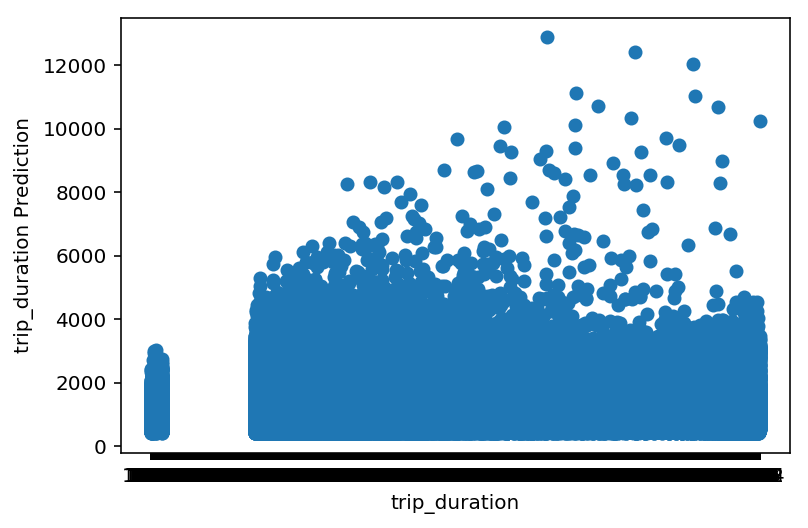

In [29]:
dfy_new = result_taxi.predict(dfX)
plt.scatter(dfy, dfy_new)

plt.xlabel("trip_duration")
plt.ylabel("trip_duration Prediction")

plt.show()

In [33]:
result_taxi.params # 모수 벡터

const                -93950.13
vendor_id                -0.15
passenger_count           0.23
pickup_longitude       -532.66
pickup_latitude        1218.45
dropoff_longitude      -225.06
dropoff_latitude       -266.55
store_and_fwd_flag       19.57
dist                    183.32
speed                   -47.50
month                     8.64
dayofweek                -1.52
hour                     -1.10
dtype: float64

In [37]:
result_taxi.resid.head(10) # 각 데이터별 잔차 (총 130만개)

0   -175.51
1   -137.11
2    543.95
3   -156.45
4   -254.71
5   -203.58
6   -150.35
7    172.85
8    -17.26
9    125.28
dtype: float64

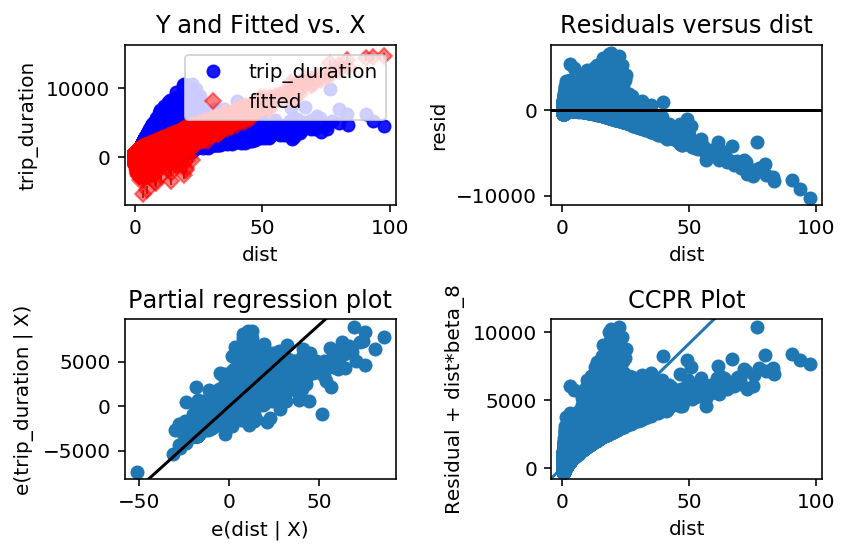

In [39]:
fig = sm.graphics.plot_regress_exog(result_taxi, "dist")
fig.suptitle("")
plt.show()

OLS(Ordinary Least Square) 방법을 사용하면 데이터에 대한 확률론적인 가정없이도 최적의 가중치를 계산할 수 있다. 그러나 이 경우에는 계산한 가중치가 어느 정도의 신뢰도 또는 안정성을 가지는지 확인할 수 있는 방법이 없다. 

이를 보완한것이 부트스트래핑

## 2. 확률론적 회귀모형

### 01. 잔차의 정규성 검정

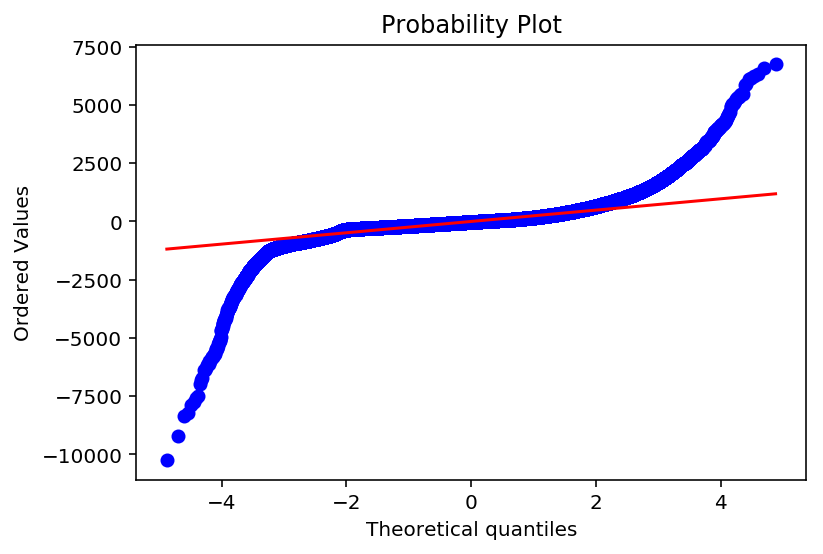

In [46]:
sp.stats.probplot(result_taxi.resid, plot=plt)
plt.show()

In [40]:
test = sms.omni_normtest(result_taxi.resid)
for xi in zip(['Chi^2', 'P-value'], test):
    print("%-12s: %6.3f" % xi)

Chi^2       : 574910.340
P-value     :  0.000


In [42]:
test = sms.jarque_bera(result_taxi.resid)
for xi in zip(['Jarque-Bera', 'P-value', 'Skew', 'Kurtosis'], test):
    print("%-12s: %6.3f" % xi)

Jarque-Bera : 53974650.772
P-value     :  0.000
Skew        :  1.188
Kurtosis    : 34.352


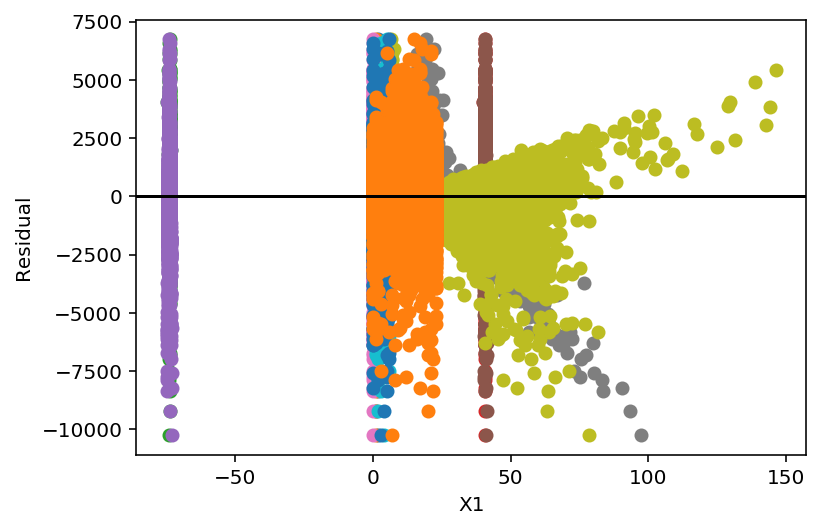

In [45]:
plt.plot(dfX0, result_taxi.resid, 'o')
plt.axhline(y=0, c='k')
plt.xlabel("X1")
plt.ylabel("Residual")
plt.show()

In [48]:
print(result_taxi.summary())

                            OLS Regression Results                            
Dep. Variable:          trip_duration   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                 5.490e+05
Date:                Mon, 05 Mar 2018   Prob (F-statistic):               0.00
Time:                        22:25:58   Log-Likelihood:            -9.1779e+06
No. Observations:             1310322   AIC:                         1.836e+07
Df Residuals:                 1310309   BIC:                         1.836e+07
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -9.395e+04    924

## 3. 레버리지

KeyboardInterrupt: 

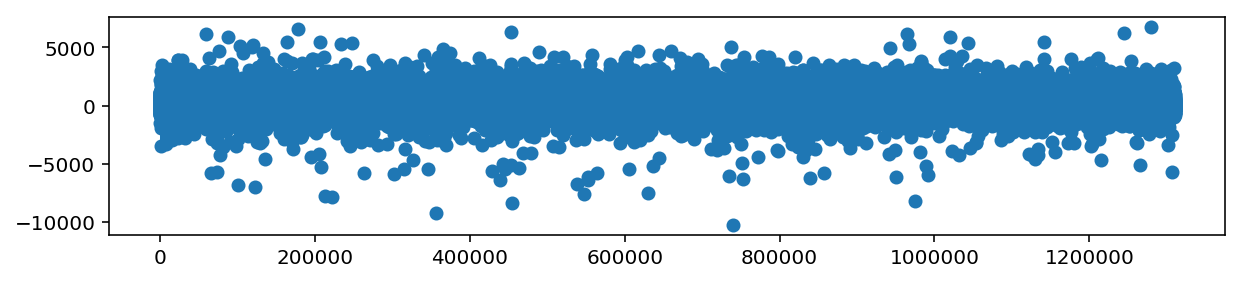

In [49]:
plt.figure(figsize=(10, 2))
plt.stem(result_taxi.resid)
plt.show()

In [ ]:
plt.figure(figsize=(10, 2))
plt.stem(result.resid_pearson)
plt.show()